<a href="https://colab.research.google.com/github/RafaelVillasmil/BIOF309_Introduction_to_Python/blob/main/Team_2_The_Python_Mystery_Machine_BIOF309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team_2 BIOF309  Spring Term 2022 - Session A                                  
- **Focus:** We selected a dataset complete with 75 columns and around 600 rows of data on the Scooby-Doo cartoon series and sequels. Within this notebook we will analyze the dataset by cleaning the data and taking a subset. Then we will plot some basic plots to get an overview of the data, move onto more analytical plots and finish with some machine learning. 
- **Authors:** ['Yonghe Ma', 'Rafael Villasmil', 'Chris Raddatz', 'Sarah Stemann']
- **Date Notebook Last Modified:** 03.16.2022

## Script 1: Mounting, loading packages and the data. 

In [49]:
# load packages
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import scipy.stats
import statsmodels.stats.weightstats as sms
import statsmodels.formula.api as smf
import statsmodels.api as sm


from matplotlib import pyplot

# ML packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [50]:
# load Scooby-Doo Complete - Episode List data as SDdata 
# Data avaialable at https://www.kaggle.com/williamschooleman/scoobydoo-complete

SDdata = pd.read_csv('/content/Scooby_Doo_Episode_Data.csv')
SDdata.shape

(615, 75)

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Script 2: Utilize functions for applications in research
### Dataset exploration and characterization
- Use Numpy to better understand the data

Here we see the main file organization. There are 75 identifiable columns. So in the next few steps we can clear that up and reduce it to some easy, comparable columns to run our analysis on.

In [52]:
# descriptions
print(SDdata.describe())

            index        imdb     engagement    run.time  monster.amount  \
count  615.000000  604.000000     604.000000  615.000000      615.000000   
mean   308.000000    7.285265     566.738411   23.591870        1.756098   
std    177.679487    0.727725    4744.533545   17.180331        2.275566   
min      1.000000    4.200000       7.000000    4.000000        0.000000   
25%    154.500000    7.000000      26.000000   12.000000        1.000000   
50%    308.000000    7.300000      52.000000   22.000000        1.000000   
75%    461.500000    7.700000     125.250000   23.000000        2.000000   
max    615.000000    9.600000  100951.000000   94.000000       19.000000   

       suspects.amount  culprit.amount    split.up  another.mystery  \
count       615.000000      615.000000  396.000000       396.000000   
mean          2.863415        1.052033    0.333333         0.174242   
std           2.594948        1.071039    0.546566         0.411780   
min           0.000000        0

In [53]:
# class distribution
print(SDdata.groupby('network').size())

network
ABC                     281
Adult Swim                1
Boomerang                85
CBS                      49
Cartoon Network          84
Syndication               3
TBC                       1
The CW                   27
The WB                   41
Warner Bros. Picture      3
Warner Home Video        40
dtype: int64


In [54]:
SDdata.head() 


,index,series.name,network,season,title,imdb,engagement,date.aired,run.time,format,...,batman,scooby-dum,scrappy-doo,hex.girls,blue.falcon,fred.va,daphne.va,velma.va,shaggy.va,scooby.va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,9/13/1969,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,9/20/1969,22,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,9/27/1969,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,10/4/1969,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,10/11/1969,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


We selected 10 columns to analyze, ranging from the name of the show to it's original air date, viewership and rating.

In [55]:
SDdata_sliced = SDdata[['index', 'series.name', 'network', 'season', 'title', 'imdb', 'date.aired', 'engagement', 'format', 'run.time']]
#If you look at the file and see anything you think should be included just add it in, there's originally 75 columns so adding one more to this list isn't a ton.
SDdata_sliced

,index,series.name,network,season,title,imdb,date.aired,engagement,format,run.time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,9/13/1969,556.0,TV Series,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,9/20/1969,479.0,TV Series,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV Series,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,10/4/1969,426.0,TV Series,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,10/11/1969,391.0,TV Series,21
...,...,...,...,...,...,...,...,...,...,...
610,611,Scooby-Doo and Guess Who?,Boomerang,2,A Haunt of a Thousand Voices!,NaN,10/1/2021,NaN,TV Series,23
611,612,Scooby-Doo and Guess Who?,Boomerang,2,The Movieland Monsters!,NaN,10/1/2021,NaN,TV Series,22
612,613,Scooby-Doo and Guess Who?,Boomerang,2,"Scooby-Doo, Dog Wonder!",NaN,10/1/2021,NaN,TV Series,23
613,614,Scooby-Doo and Guess Who?,Boomerang,2,The Legend of the Gold Microphone!,NaN,10/1/2021,NaN,TV Series,22


In the next line of code we change the names of the columns, making them look better and more comprehensible.

In [56]:
SDdata_sliced.rename(columns = {'index':'Index','series.name':'Series', 'network':'Network', 'season':'Season', 'title':'Title', 'imdb':'Rating', 'date.aired': 'Date Aired', 'engagement':'Viewers', 
                                'format':'Format', 'run.time':'Run Time'}, inplace = True)

SDdata_sliced

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,9/13/1969,556.0,TV Series,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,9/20/1969,479.0,TV Series,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV Series,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,10/4/1969,426.0,TV Series,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,10/11/1969,391.0,TV Series,21
...,...,...,...,...,...,...,...,...,...,...
610,611,Scooby-Doo and Guess Who?,Boomerang,2,A Haunt of a Thousand Voices!,NaN,10/1/2021,NaN,TV Series,23
611,612,Scooby-Doo and Guess Who?,Boomerang,2,The Movieland Monsters!,NaN,10/1/2021,NaN,TV Series,22
612,613,Scooby-Doo and Guess Who?,Boomerang,2,"Scooby-Doo, Dog Wonder!",NaN,10/1/2021,NaN,TV Series,23
613,614,Scooby-Doo and Guess Who?,Boomerang,2,The Legend of the Gold Microphone!,NaN,10/1/2021,NaN,TV Series,22


In [57]:
SDdata_sliced.describe() #This is just to get an overview of the file

,Index,Rating,Viewers,Run Time
count,615.000000,604.000000,604.000000,615.000000
mean,308.000000,7.285265,566.738411,23.591870
std,177.679487,0.727725,4744.533545,17.180331
min,1.000000,4.200000,7.000000,4.000000
25%,154.500000,7.000000,26.000000,12.000000
50%,308.000000,7.300000,52.000000,22.000000
75%,461.500000,7.700000,125.250000,23.000000
max,615.000000,9.600000,100951.000000,94.000000


There are 11 values that don't contain a rating. The standard deviation for viewers is high, indicating some shows to be much more popular than others. 

So now we will start to clean out the data we don't want, which is the genre that don't have a large sample size such as Genre of Crossovers.

In [58]:
#To isolate TV and Movies we need to eliminate Crossovers
SDdata_tv_movies = SDdata_sliced[SDdata_sliced['Format'] != 'Crossover']

This gives a dataset of just Movies and TV series, which we can separate into two independent sets of either Format. 

In [59]:
SDdata_tv_movies #So we should have 607 rows after we clean the rest of this up.

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,9/13/1969,556.0,TV Series,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,9/20/1969,479.0,TV Series,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV Series,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,10/4/1969,426.0,TV Series,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,10/11/1969,391.0,TV Series,21
...,...,...,...,...,...,...,...,...,...,...
610,611,Scooby-Doo and Guess Who?,Boomerang,2,A Haunt of a Thousand Voices!,NaN,10/1/2021,NaN,TV Series,23
611,612,Scooby-Doo and Guess Who?,Boomerang,2,The Movieland Monsters!,NaN,10/1/2021,NaN,TV Series,22
612,613,Scooby-Doo and Guess Who?,Boomerang,2,"Scooby-Doo, Dog Wonder!",NaN,10/1/2021,NaN,TV Series,23
613,614,Scooby-Doo and Guess Who?,Boomerang,2,The Legend of the Gold Microphone!,NaN,10/1/2021,NaN,TV Series,22


In [60]:
RemoveTVSeries = SDdata_tv_movies[SDdata_tv_movies['Format'] != 'TV Series']
Movies = RemoveTVSeries[RemoveTVSeries['Format'] != 'TV Series (segmented)'] 
#Have to put this because some Series have 'segmented' and the previous line won't catch them

In [61]:
Movies #This should be all elements that are Movies #There are 47 rows here.

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
152,153,Scooby Goes Hollywood,ABC,Movie,Scooby Goes Hollywood,6.1,12/14/1979,1051.0,Movie,49
300,301,Hanna-Barbera Superstars 10,Syndication,Special,Scooby-Doo Meets the Boo Brothers,7.1,10/18/1987,3727.0,Movie,92
307,308,Hanna-Barbera Superstars 10,Syndication,Special,Scooby-Doo and the Ghoul School,6.9,10/16/1988,4487.0,Movie,92
312,313,Hanna-Barbera Superstars 10,Syndication,Special,Scooby-Doo! and the Reluctant Werewolf,6.9,11/13/1988,3924.0,Movie,91
333,334,TV Special,TBC,Special,Arabian Nights,5.8,9/3/1994,1526.0,Movie,69
335,336,Warner Home Video,Warner Home Video,Movie,Scooby-Doo on Zombie Island,7.8,9/22/1998,12620.0,Movie,76
336,337,Warner Home Video,Warner Home Video,Movie,Scooby-Doo and the Witch's Ghost,7.3,10/5/1999,6527.0,Movie,66
338,339,Warner Home Video,Warner Home Video,Movie,Scooby-Doo and the Alien Invaders,6.9,10/3/2000,5625.0,Movie,73
339,340,Warner Home Video,Warner Home Video,Movie,Scooby-Doo and the Cyber Chase,7.0,10/9/2001,6632.0,Movie,73
341,342,Warner Bros. Picture,Warner Bros. Picture,Movie,Scooby-Doo,5.1,6/14/2002,100951.0,Movie (Theatrical),87


In [62]:
Movies_top = Movies.sort_values(by='Rating', ascending=False)
Movies_top.head() # which serie is rated toppest in Movies.

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
335,336,Warner Home Video,Warner Home Video,Movie,Scooby-Doo on Zombie Island,7.8,9/22/1998,12620.0,Movie,76
554,555,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! and the Gourmet Ghost,7.3,9/11/2018,825.0,Movie,77
336,337,Warner Home Video,Warner Home Video,Movie,Scooby-Doo and the Witch's Ghost,7.3,10/5/1999,6527.0,Movie,66
432,433,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! Camp Scare,7.3,9/14/2010,2566.0,Movie,72
484,485,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! Stage Fright,7.1,8/20/2013,1380.0,Movie,78


In [63]:
RemoveMovies = SDdata_tv_movies[SDdata_tv_movies['Format'] != 'Movie']
TVSeries = RemoveMovies[RemoveMovies['Format'] != 'Movie (Theatrical)'] 
#Again have to remove this special case of the additional (Theatrical)

In [64]:
TVSeries #There are 560. 560 + 47 = 607, everything is accounted for.

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,9/13/1969,556.0,TV Series,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,9/20/1969,479.0,TV Series,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV Series,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,10/4/1969,426.0,TV Series,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,10/11/1969,391.0,TV Series,21
...,...,...,...,...,...,...,...,...,...,...
610,611,Scooby-Doo and Guess Who?,Boomerang,2,A Haunt of a Thousand Voices!,NaN,10/1/2021,NaN,TV Series,23
611,612,Scooby-Doo and Guess Who?,Boomerang,2,The Movieland Monsters!,NaN,10/1/2021,NaN,TV Series,22
612,613,Scooby-Doo and Guess Who?,Boomerang,2,"Scooby-Doo, Dog Wonder!",NaN,10/1/2021,NaN,TV Series,23
613,614,Scooby-Doo and Guess Who?,Boomerang,2,The Legend of the Gold Microphone!,NaN,10/1/2021,NaN,TV Series,22


In [65]:
TVSeries_top = TVSeries.sort_values(by='Rating', ascending=False)
TVSeries_top.head() # which series is rated best in TVSeries.

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
482,483,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Come Undone,9.3,4/5/2013,260.0,TV Series,22
450,451,Scooby-Doo Mystery Incorporated,Cartoon Network,1,All Fear the Freak,9.2,7/26/2011,272.0,TV Series,23
463,464,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Night Terrors,9.1,8/10/2012,202.0,TV Series,23
481,482,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Through the Curtain,9.0,4/5/2013,184.0,TV Series,22
466,467,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Wrath of the Krampus,8.9,8/15/2012,207.0,TV Series,22


## Script 3: Exploratory Data Visualization 
### Using Seaborn
- Simple visualization to reach a basic comprehension of the data. 

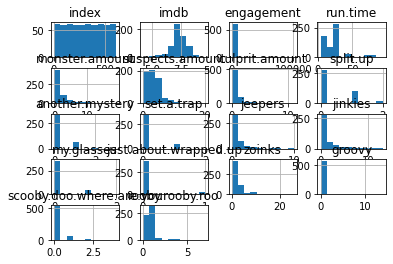

In [66]:
...
# histograms
SDdata.hist()
pyplot.show()

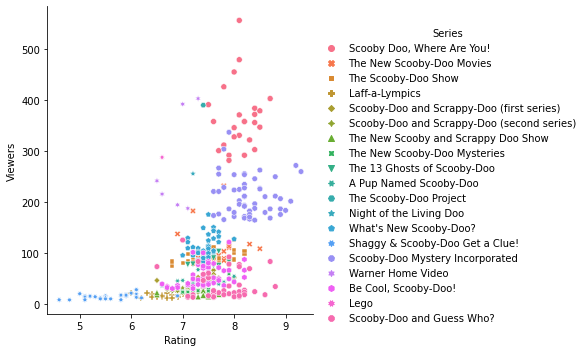

In [67]:
sns.relplot(x="Rating", y="Viewers", style="Series", hue = 'Series',
            data=TVSeries)

This is a bit convoluted, as many of the series fall in the category of being rated semi-well, but with low viewership. The only two series that are really competing is the original, and a sequel Scooby-Doo Mystery Incorporated. So let's run some arithmetic to compare the two.

In [68]:
Whereareyou = TVSeries[TVSeries['Series'] == 'Scooby Doo, Where Are You!']
Whereareyou.head() #Creating dataset for just the original series


,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,9/13/1969,556.0,TV Series,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,9/20/1969,479.0,TV Series,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV Series,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,10/4/1969,426.0,TV Series,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,10/11/1969,391.0,TV Series,21


In [69]:
Mystery = TVSeries[TVSeries['Series'] == 'Scooby-Doo Mystery Incorporated']
Mystery.head() #Creating dataset for a sequel "Scooby-Doo Mystery Incorporated"

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
423,424,Scooby-Doo Mystery Incorporated,Cartoon Network,1,Beware the Beast From Below,7.9,4/5/2010,337.0,TV Series,23
424,425,Scooby-Doo Mystery Incorporated,Cartoon Network,1,The Creeping Creatures,7.8,7/19/2010,304.0,TV Series,23
425,426,Scooby-Doo Mystery Incorporated,Cartoon Network,1,The Secret of the Ghost Rig,7.7,7/26/2010,267.0,TV Series,23
426,427,Scooby-Doo Mystery Incorporated,Cartoon Network,1,Revenge of the Man Crab,7.7,8/2/2010,255.0,TV Series,22
427,428,Scooby-Doo Mystery Incorporated,Cartoon Network,1,The Song of Mystery,8.0,8/9/2010,254.0,TV Series,22


In [70]:
print('Scooby Doo, Where Are You! Average Rating: ', Whereareyou['Rating'].mean())
print("Average Viewership: ", Whereareyou['Viewers'].mean())
print("\n")
print('Scooby-Doo Mystery Incorporated Average Rating: ', Mystery['Rating'].mean())
print("Average Viewership: ", Mystery['Viewers'].mean())


Scooby Doo, Where Are You! Average Rating:  8.112
Average Viewership:  364.08


Scooby-Doo Mystery Incorporated Average Rating:  8.294230769230769
Average Viewership:  211.94230769230768


It appears that although the original series of "Scooby Doo, Where Are You!" outperforms the other series in regards to popularity, one can suggest that "Scooby-Doo Mystery Incorporated" was a better show because it had a higher average rating.

We can also see how networks may have played a part in how the series was received critically. 

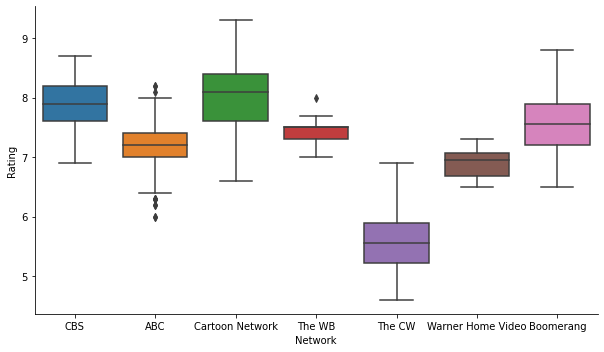

In [71]:
bar_plot_1 = sns.catplot(x='Network', y='Rating', kind='box', data= TVSeries, aspect= 1.7) # which network is rated highest for all TV series.

Now moving into Movies...

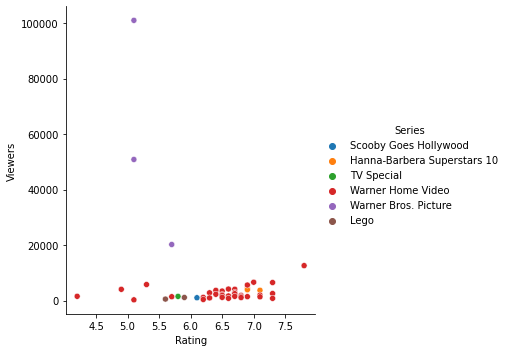

In [72]:
sns.relplot(x = 'Rating', y = 'Viewers', hue = 'Series', data = Movies)

Although Warner Bros. Pictures weren't rated very well, they clearly exceeded the other movies in popularity. 

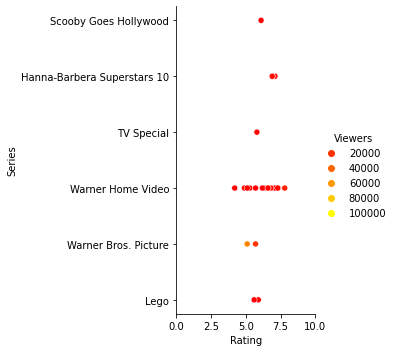

In [73]:
sr_plot = sns.relplot(x = 'Rating', y = 'Series', hue = 'Viewers', data = Movies, palette = 'autumn')
sr_plot.set(xlim=(0, 10))

[(0.0, 10.0)]

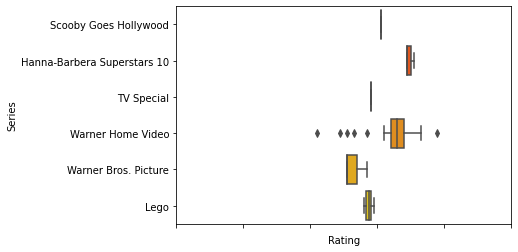

In [74]:
sr_plot = sns.boxplot(x = 'Rating', y = 'Series', data = Movies, palette = 'autumn')
sr_plot.set_xticklabels(sr_plot.get_xticklabels(),rotation=65)
sr_plot.set(xlim=(0, 10))

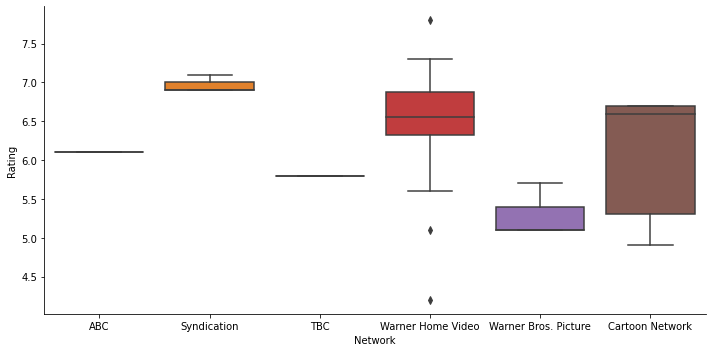

In [75]:
bar_plot_2 = sns.catplot(x='Network', y='Rating', kind='box', data= Movies, aspect= 2) # which network is rated highest for all Movies.

## Script 4: Descriptive statistics analyses
### Using statsmodels and scipy 
- hypothesis testing and regression models

In [76]:
# identify columsn with continuous variable data of float64 type
cols_float64 = SDdata.select_dtypes([np.float64]).columns
# identify columsn with variable data of int64 type
cols_int64 = SDdata.select_dtypes([np.int64]).columns

# create data machine learning
df1 = pd.DataFrame(SDdata[cols_int64])
df2 = pd.DataFrame(SDdata[cols_float64])
frames = [df1, df2]
MLdata = pd.concat(frames, axis=1)

# remove nan in imdb 
MLdata = MLdata[MLdata['imdb'].notna()]

# impute nan in non imdb 
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_MLdata = pd.DataFrame(fill_NaN.fit_transform(MLdata))
imputed_MLdata.columns = MLdata.columns
imputed_MLdata.index = MLdata.index
imputed_MLdata.isnull().values.any()

MLdata = imputed_MLdata
MLdata = MLdata.astype({'index':int})
MLdata 

,index,run.time,monster.amount,suspects.amount,culprit.amount,imdb,engagement,split.up,another.mystery,set.a.trap,jeepers,jinkies,my.glasses,just.about.wrapped.up,zoinks,groovy,scooby.doo.where.are.you,rooby.rooby.roo
0,1,21.0,1.0,2.0,1.0,8.1,556.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,22.0,1.0,2.0,1.0,8.1,479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
2,3,21.0,1.0,0.0,1.0,8.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
3,4,21.0,1.0,2.0,1.0,7.8,426.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,5,21.0,1.0,1.0,1.0,7.5,391.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,600,76.0,2.0,5.0,2.0,6.3,978.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
600,601,77.0,2.0,8.0,1.0,6.2,422.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
601,602,22.0,1.0,9.0,3.0,7.5,17.0,1.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0
602,603,23.0,1.0,2.0,1.0,8.1,17.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
# Linear model, is imdb associated with jeepers?
this_formula = "jeepers ~ imdb"
res = smf.ols(formula=this_formula, data=MLdata).fit()
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                jeepers   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.411
Date:                Thu, 17 Mar 2022   Prob (F-statistic):             0.0652
Time:                        17:24:14   Log-Likelihood:                -922.92
No. Observations:                 604   AIC:                             1850.
Df Residuals:                     602   BIC:                             1859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4129      0.458      3.087      0.0

imdb is negatively associated with jeepers, very strongly!

## Script 5: Create data visualization plots comparing ratings to formats and runtimes
### Using Pandas, Numpy, Seaborn and Matplotlib
- Explanation of the data by placing it in a visual context

In [78]:
#I want to only have TV vs Movies Formats (seasons are still sort of wonky)
SDdata_tv_movies_only = SDdata_tv_movies.replace({'Format':{'TV Series':'TV', 'TV Series (segmented)': 'TV', 'Movie (Theatrical)':'Movie'}})
SDdata_tv_movies_only

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,9/13/1969,556.0,TV,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,9/20/1969,479.0,TV,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,10/4/1969,426.0,TV,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,10/11/1969,391.0,TV,21
...,...,...,...,...,...,...,...,...,...,...
610,611,Scooby-Doo and Guess Who?,Boomerang,2,A Haunt of a Thousand Voices!,NaN,10/1/2021,NaN,TV,23
611,612,Scooby-Doo and Guess Who?,Boomerang,2,The Movieland Monsters!,NaN,10/1/2021,NaN,TV,22
612,613,Scooby-Doo and Guess Who?,Boomerang,2,"Scooby-Doo, Dog Wonder!",NaN,10/1/2021,NaN,TV,23
613,614,Scooby-Doo and Guess Who?,Boomerang,2,The Legend of the Gold Microphone!,NaN,10/1/2021,NaN,TV,22


In [79]:
#I want to only have TV vs Movies with ratings rounded so the graphs were less cluttered
SDdata_tv_movies_only_rounded = SDdata_tv_movies_only.round({'Rating':0})
SDdata_tv_movies_only_rounded

,Index,Series,Network,Season,Title,Rating,Date Aired,Viewers,Format,Run Time
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.0,9/13/1969,556.0,TV,21
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.0,9/20/1969,479.0,TV,22
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,9/27/1969,455.0,TV,21
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,8.0,10/4/1969,426.0,TV,21
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,8.0,10/11/1969,391.0,TV,21
...,...,...,...,...,...,...,...,...,...,...
610,611,Scooby-Doo and Guess Who?,Boomerang,2,A Haunt of a Thousand Voices!,NaN,10/1/2021,NaN,TV,23
611,612,Scooby-Doo and Guess Who?,Boomerang,2,The Movieland Monsters!,NaN,10/1/2021,NaN,TV,22
612,613,Scooby-Doo and Guess Who?,Boomerang,2,"Scooby-Doo, Dog Wonder!",NaN,10/1/2021,NaN,TV,23
613,614,Scooby-Doo and Guess Who?,Boomerang,2,The Legend of the Gold Microphone!,NaN,10/1/2021,NaN,TV,22


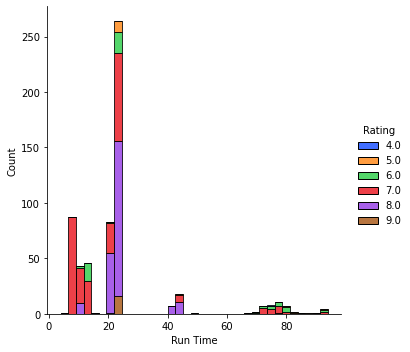

In [80]:
#visualizing frequency of the rating by runtime
sns.displot(SDdata_tv_movies_only_rounded, x="Run Time", hue = "Rating", multiple = "stack", palette = "bright")

The typical tv show length gardered the most viewers/ratings and seems to primarily live in the 7-8 ratings while longer "episodes" (movies) were around 6-7 ratings

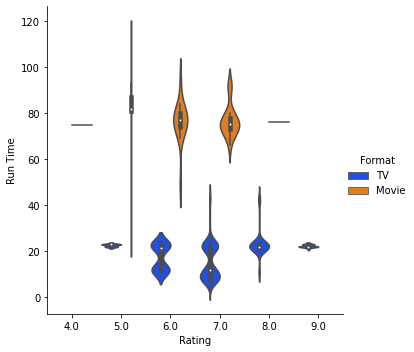

In [81]:
#comparing the ratings by format broken out by format and season 
sns.catplot(x="Rating", y="Run Time", hue="Format", kind="violin", data= SDdata_tv_movies_only_rounded, palette = "bright");


## Script 6: machine learning Create data visualization plots comparing ratings to formats and runtimes
### Using Pandas, Numpy, Seaborn and Matplotlib
- Explanation of the data by placing it in a visual context

In [82]:
# Split-out validation dataset
array = MLdata.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [83]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


LR: 0.724957 (0.057458)
LDA: 0.689583 (0.046142)
KNN: 0.722704 (0.052756)
CART: 0.666709 (0.035816)
NB: 0.679167 (0.053779)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


SVM: 0.648002 (0.038238)


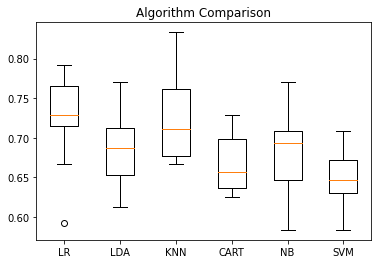

In [84]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

The algorithms are less than 85% accurate at their best. 

In [85]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [86]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.628099173553719
[[15 17  0  0  0]
 [ 5 61  1  0  0]
 [ 0 14  0  0  0]
 [ 0  7  0  0  0]
 [ 0  1  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.75      0.47      0.58        32
         1.0       0.61      0.91      0.73        67
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         1

    accuracy                           0.63       121
   macro avg       0.27      0.28      0.26       121
weighted avg       0.54      0.63      0.56       121



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model has room for improvement in the number of categories of shows as well as in the classification.

Machine learning approach adapted from:
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/